## <center>Проект. Авиарейсы без потерь
## <center>Аналитическая часть

Главной задачей модуля являлось составление датасета из базы данных авиаперевозок при помощи SQL запросов. В датасете должны входить данные, которые помогут проанализировать прибыльность рейсов из Анапы в зимнее время.<br>

Результат выполнения основной задачи (SQL код и датасет) выложены отдельными файлами.

В аналитической части проекта необходимо посчитать прибыльность рейсов. На основании полученных результатов сделать выводы от каких рейсов можно отказаться.

In [1]:
import pandas as pd

In [2]:
#загружаем наш датасет
df = pd.read_csv('Dataset.csv')

In [3]:
df.sample(6)

,flight_id,dep_city,arr_city,scheduled_arrival,model,proceeds,travel_time
76,136632,Anapa,Belgorod,2017-01-07T10:15:00Z,Sukhoi Superjet-100,714300.0,50.0
74,136620,Anapa,Belgorod,2017-02-17T10:15:00Z,Sukhoi Superjet-100,613500.0,50.0
40,136383,Anapa,Moscow,2017-01-25T11:45:00Z,Boeing 737-300,1493200.0,100.0
122,136936,Anapa,Belgorod,2017-01-02T10:15:00Z,Sukhoi Superjet-100,632400.0,50.0
31,136310,Anapa,Moscow,2017-01-22T11:45:00Z,Boeing 737-300,1654200.0,100.0
55,136471,Anapa,Moscow,2017-01-17T11:45:00Z,Boeing 737-300,1762800.0,100.0


##### Данные датасета:
- <b>flight_id</b> - уникальный идентификатор рейса<br>
- <b>dep_city</b> - город вылета самолета (Анапа)<br>
- <b>arr_city</b> - город прибытия самолета<br>
- <b>sheduled_arrival</b> - время вылета самолет<br>
- <b>model</b> - модель самолета<br>
- <b>proceeds</b> - общая сумма проданных на рейс билетов<br>
- <b>travel_time</b> - время самолета в пути (в минутах)<br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          127 non-null    int64  
 1   dep_city           127 non-null    object 
 2   arr_city           127 non-null    object 
 3   scheduled_arrival  127 non-null    object 
 4   model              127 non-null    object 
 5   proceeds           118 non-null    float64
 6   travel_time        127 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.1+ KB


In [5]:
# удаляем пустые значения:
df.dropna(inplace = True)

In [6]:
df.sample(6)

,flight_id,dep_city,arr_city,scheduled_arrival,model,proceeds,travel_time
41,136387,Anapa,Moscow,2017-01-19T11:45:00Z,Boeing 737-300,1775000.0,100.0
78,136645,Anapa,Belgorod,2017-01-05T10:15:00Z,Sukhoi Superjet-100,633000.0,50.0
54,136464,Anapa,Moscow,2017-01-09T11:45:00Z,Boeing 737-300,1398000.0,100.0
125,136953,Anapa,Belgorod,2017-02-27T10:15:00Z,Sukhoi Superjet-100,765300.0,50.0
90,136729,Anapa,Belgorod,2017-01-29T10:15:00Z,Sukhoi Superjet-100,695400.0,50.0
37,136351,Anapa,Moscow,2017-02-26T11:45:00Z,Boeing 737-300,1555400.0,100.0


Чтобы посчитать прибыльность, дополнительно введем в датасет следующие значения:<br>
- <b>fuel_price</b> - цена авиционного топлива (46424 руб.) <br>
- <b>fuel_cons</b> - расход топлива расход топлива в тоннах конкретной модели самолета в час<br>

In [7]:
df['model'].value_counts()

Boeing 737-300         59
Sukhoi Superjet-100    59
Name: model, dtype: int64

У нас только две модели самолетов. <br>
Расход топлива в тоннах конкретной модели самолета в час (<b>fuel_cons</b>):<br><br>
<i>Boeing 737-300</i> - 2.4 тонн/час<br>
<i>Sukhoi Superjet-100</i> - 1.7 тонн/час

In [8]:
# добавим в датасет нужные данные
df['fuel_price'] = 46424
df['fuel_cons'] = df['model'].apply(lambda x: 2.4 if x == 'Boeing 737-300' else 1.7)    

In [9]:
df.sample(6)

,flight_id,dep_city,arr_city,scheduled_arrival,model,proceeds,travel_time,fuel_price,fuel_cons
27,136275,Anapa,Moscow,2017-01-13T11:45:00Z,Boeing 737-300,1825000.0,100.0,46424,2.4
28,136282,Anapa,Moscow,2017-01-16T11:45:00Z,Boeing 737-300,1518800.0,100.0,46424,2.4
112,136861,Anapa,Belgorod,2017-02-12T10:15:00Z,Sukhoi Superjet-100,689100.0,50.0,46424,1.7
46,136423,Anapa,Moscow,2017-01-10T11:45:00Z,Boeing 737-300,1849400.0,100.0,46424,2.4
84,136669,Anapa,Belgorod,2017-01-17T10:15:00Z,Sukhoi Superjet-100,752700.0,50.0,46424,1.7
114,136871,Anapa,Belgorod,2017-01-13T10:15:00Z,Sukhoi Superjet-100,765300.0,50.0,46424,1.7


Прибыльность рейса расчитаем по такой формуле: <br><br>
<b>profit = proceeds - fuel_price * fuel_cons * (travel_time)/60</b>

In [10]:
df['profit']=df['proceeds'] -  df['fuel_price'] * df['fuel_cons'] * df['travel_time']/60

In [11]:
pd.options.display.float_format ='{:,.2f}'.format
df.sample(6)

,flight_id,dep_city,arr_city,scheduled_arrival,model,proceeds,travel_time,fuel_price,fuel_cons,profit
57,136485,Anapa,Moscow,2017-01-27T11:45:00Z,Boeing 737-300,"1,520,000.00",100.00,46424,2.40,"1,334,304.00"
71,136605,Anapa,Belgorod,2017-02-15T10:15:00Z,Sukhoi Superjet-100,"765,300.00",50.00,46424,1.70,"699,532.67"
121,136927,Anapa,Belgorod,2017-01-22T10:15:00Z,Sukhoi Superjet-100,"765,300.00",50.00,46424,1.70,"699,532.67"
68,136571,Anapa,Belgorod,2017-01-25T10:15:00Z,Sukhoi Superjet-100,"752,700.00",50.00,46424,1.70,"686,932.67"
15,136202,Anapa,Moscow,2017-01-05T11:45:00Z,Boeing 737-300,"1,495,600.00",100.00,46424,2.40,"1,309,904.00"
29,136284,Anapa,Moscow,2017-02-07T11:45:00Z,Boeing 737-300,"1,677,400.00",100.00,46424,2.40,"1,491,704.00"


In [12]:
# Найдем среднюю прибыль по рейсам
df['profit'].mean()

1050774.2655367258

In [13]:
# Средняя прибыль в зависимости от города прибытия
df.groupby('arr_city')['profit'].mean()

arr_city
Belgorod     644,668.26
Moscow     1,456,880.27
Name: profit, dtype: float64

<AxesSubplot:xlabel='arr_city'>

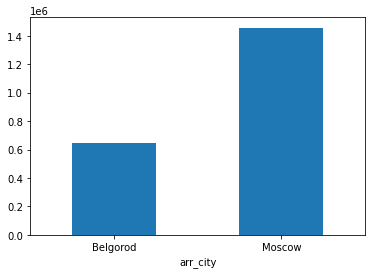

In [14]:
arr_city = df.groupby('arr_city')['profit'].mean()
arr_city.plot.bar(rot=0) #Прибыль в млн. рублей

In [15]:
# Средняя прибыль в зависимости от модели самолета
df.groupby('model')['profit'].mean()

model
Boeing 737-300        1,456,880.27
Sukhoi Superjet-100     644,668.26
Name: profit, dtype: float64

<AxesSubplot:xlabel='model'>

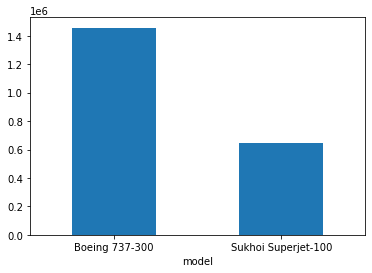

In [16]:
model = df.groupby('model')['profit'].mean()
model.plot.bar(rot=0) #Прибыль в млн. рублей

Средние показатели прибыли по городам прибытия и моделям самолета совпадают, т.к. параметры имеют между собой прямю зависимость.

In [17]:
# Отсортируем  рейсы по прибыльности в порядке убывания
df.sort_values(by=['profit']).head(10)

,flight_id,dep_city,arr_city,scheduled_arrival,model,proceeds,travel_time,fuel_price,fuel_cons,profit
102,136807,Anapa,Belgorod,2017-02-23T10:15:00Z,Sukhoi Superjet-100,"531,000.00",50.00,46424,1.70,"465,232.67"
77,136642,Anapa,Belgorod,2017-01-30T10:15:00Z,Sukhoi Superjet-100,"531,000.00",50.00,46424,1.70,"465,232.67"
109,136844,Anapa,Belgorod,2017-02-28T10:15:00Z,Sukhoi Superjet-100,"575,100.00",50.00,46424,1.70,"509,332.67"
116,136887,Anapa,Belgorod,2017-01-20T10:15:00Z,Sukhoi Superjet-100,"595,200.00",50.00,46424,1.70,"529,432.67"
120,136922,Anapa,Belgorod,2017-02-11T10:15:00Z,Sukhoi Superjet-100,"607,800.00",50.00,46424,1.70,"542,032.67"
74,136620,Anapa,Belgorod,2017-02-17T10:15:00Z,Sukhoi Superjet-100,"613,500.00",50.00,46424,1.70,"547,732.67"
105,136823,Anapa,Belgorod,2017-02-05T10:15:00Z,Sukhoi Superjet-100,"620,400.00",50.00,46424,1.70,"554,632.67"
123,136937,Anapa,Belgorod,2017-01-03T10:15:00Z,Sukhoi Superjet-100,"626,100.00",50.00,46424,1.70,"560,332.67"
117,136888,Anapa,Belgorod,2017-02-14T10:15:00Z,Sukhoi Superjet-100,"626,100.00",50.00,46424,1.70,"560,332.67"
86,136678,Anapa,Belgorod,2017-01-28T10:15:00Z,Sukhoi Superjet-100,"631,200.00",50.00,46424,1.70,"565,432.67"


Таким образом, самыми малоприбыльными рейсами оказались рейсы  в Белгород. Самыми-самыми малоприбыльными оказались рейс в праздничный день 23 февраля и рейс 30 января.

In [18]:
# создадим столбец со днями неделями (0 - Понедельник, .. 6 - Воскресенье)
df['days_of_week'] = pd.to_datetime(df['scheduled_arrival']).dt.dayofweek

In [19]:
df.sort_values(by=['profit']).head(10)

,flight_id,dep_city,arr_city,scheduled_arrival,model,proceeds,travel_time,fuel_price,fuel_cons,profit,days_of_week
102,136807,Anapa,Belgorod,2017-02-23T10:15:00Z,Sukhoi Superjet-100,"531,000.00",50.00,46424,1.70,"465,232.67",3
77,136642,Anapa,Belgorod,2017-01-30T10:15:00Z,Sukhoi Superjet-100,"531,000.00",50.00,46424,1.70,"465,232.67",0
109,136844,Anapa,Belgorod,2017-02-28T10:15:00Z,Sukhoi Superjet-100,"575,100.00",50.00,46424,1.70,"509,332.67",1
116,136887,Anapa,Belgorod,2017-01-20T10:15:00Z,Sukhoi Superjet-100,"595,200.00",50.00,46424,1.70,"529,432.67",4
120,136922,Anapa,Belgorod,2017-02-11T10:15:00Z,Sukhoi Superjet-100,"607,800.00",50.00,46424,1.70,"542,032.67",5
74,136620,Anapa,Belgorod,2017-02-17T10:15:00Z,Sukhoi Superjet-100,"613,500.00",50.00,46424,1.70,"547,732.67",4
105,136823,Anapa,Belgorod,2017-02-05T10:15:00Z,Sukhoi Superjet-100,"620,400.00",50.00,46424,1.70,"554,632.67",6
123,136937,Anapa,Belgorod,2017-01-03T10:15:00Z,Sukhoi Superjet-100,"626,100.00",50.00,46424,1.70,"560,332.67",1
117,136888,Anapa,Belgorod,2017-02-14T10:15:00Z,Sukhoi Superjet-100,"626,100.00",50.00,46424,1.70,"560,332.67",1
86,136678,Anapa,Belgorod,2017-01-28T10:15:00Z,Sukhoi Superjet-100,"631,200.00",50.00,46424,1.70,"565,432.67",5


<AxesSubplot:xlabel='days_of_week'>

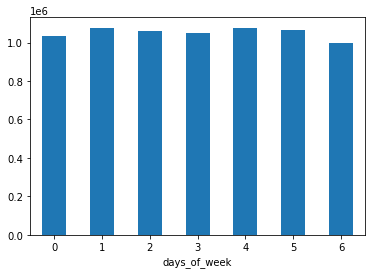

In [20]:
#Посмотрим прибыль по дням недели
model = df.groupby('days_of_week')['profit'].mean()
model.plot.bar(rot = 0) 

In [21]:
df.groupby('days_of_week')['profit'].mean()

days_of_week
0   1,033,968.33
1   1,076,435.00
2   1,061,199.58
3   1,049,468.33
4   1,074,662.08
5   1,066,805.83
6     998,329.44
Name: profit, dtype: float64

Самая маленькая прибыль для всех рейсов оказалась по воскресеньям (6)

Посмотрим на прибыль по дням недели, но только для рейсов Анапа-Белгород:

<AxesSubplot:xlabel='days_of_week'>

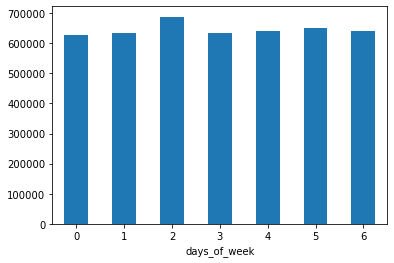

In [22]:
model = df[df['arr_city'] == 'Belgorod'].groupby('days_of_week')['profit'].mean()
model.plot.bar(rot = 0) 

In [23]:
df[df['arr_city'] == 'Belgorod'].groupby('days_of_week')['profit'].mean()

days_of_week
0   628,566.00
1   632,699.33
2   687,720.17
3   633,157.67
4   640,395.17
5   651,982.67
6   641,999.33
Name: profit, dtype: float64

Для рейсов Анапа-Белгород самый неприбыльный день это понедельник (0).

<b>Итоги:</b> <br><br>
Анализ датасета показал положительную доходность на всех рейсах. Но для реальной прибыльности необходимо учитывать дополнительные расходы (такие как зарплата персонала и техническое обслуживание). Тем не менее, как показал анализ, невозможно точно определить, какие рейсы оказались реально убыточными. Поэтому, предлагаю оставить все рейсы. Возможно, можно отказаться от рейсов <b>Анапа-Белгород (PG0252)</b> <b>23 февраля</b> и <b>30 января</b> как наименее прибыльных.